# Metadata

```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Title: Similarity and Distance Measures

Description: Compute cosine similarity with ward clustering and distance measures by working with a larger BOW (OHCO[:1]).  K-means clustering is included.  

Original Code Author: R.C. Alvarado, Module 06 Lab, Similarity and Distance Measures
```

# Set Up

In [1]:
data_home = "./data"
data_prefix = "folger"

In [2]:
BAG = ['play_code', 'act_num']
OHCO = ['play_code', 'act_num', 'scene_num', 'speech_id', 'speaker','line_num']

In [4]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns; sns.set()

In [5]:
from numpy.linalg import norm
from scipy.spatial.distance import pdist

# Prepare Data

## Acquire Data

We use the results of our previous work in which TFIDF was computed from a corpus. 

In [6]:
BOW = pd.read_csv(f'{data_home}/{data_prefix}-BOW.csv', low_memory=False).set_index(BAG+['term_str']).dropna()
VOCAB = pd.read_csv(f'{data_home}/{data_prefix}-VOCAB2.csv', low_memory=False).set_index('term_str').dropna()
LIB = pd.read_csv(f'{data_home}/{data_prefix}-LIB2.csv', low_memory=False).set_index('play_code').dropna()

## Unstack `BOW` into `TFIDIF` matrix

This is a document-term matrix with TFIDF weights.

In [7]:
# before collapsing bags, obtain the top 8 words in BAG(OCHO[:2])
BOW.tfidf.sort_values(ascending=False).to_frame().head(8)

,,,tfidf
play_code,act_num,term_str,
AYL,5,ding,0.715685
Wiv,2,flies,0.663572
Mac,1,thane,0.616439
Err,4,chain,0.561514
Cor,2,voices,0.488446
Wiv,2,flying,0.455102
AWW,5,ring,0.448027
MV,5,clerk,0.443115


In [8]:
TFIDF = BOW.tfidf.unstack(fill_value=0)

In [9]:
TFIDF

term_str           abbey  abhor  abhorred     abide    abject  able  aboard  \
play_code act_num                                                             
1H4       1          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          2          0.0    0.0       0.0  0.036287  0.000000   0.0     0.0   
          3          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          4          0.0    0.0       0.0  0.000000  0.024708   0.0     0.0   
          5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
...                  ...    ...       ...       ...       ...   ...     ...   
WT        5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
Wiv       2          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          3          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          4          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   

term_str           abroad   absence    absent  ...  youd     youll     young  \
play_code act_num                              ...                             
1H4       1           0.0  0.000000  0.029245  ...   0.0  0.000000  0.079127   
          2           0.0  0.000000  0.000000  ...   0.0  0.000000  0.016599   
          3           0.0  0.000000  0.000000  ...   0.0  0.000000  0.011351   
          4           0.0  0.050454  0.000000  ...   0.0  0.000000  0.017805   
          5           0.0  0.000000  0.028435  ...   0.0  0.000000  0.012822   
...                   ...       ...       ...  ...   ...       ...       ...   
WT        5           0.0  0.000000  0.000000  ...   0.0  0.036218  0.036593   
Wiv       2           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   
          3           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   
          4           0.0  0.000000  0.000000  ...   0.0  0.065006  0.000000   
          5           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   

term_str            younger  youngest  youre     youth  youthful      zeal  \
play_code act_num                                                            
1H4       1        0.000000       0.0    0.0  0.015796  0.028830  0.000000   
          2        0.000000       0.0    0.0  0.039764  0.000000  0.000000   
          3        0.024816       0.0    0.0  0.013597  0.000000  0.000000   
          4        0.000000       0.0    0.0  0.042654  0.038925  0.000000   
          5        0.028031       0.0    0.0  0.030717  0.000000  0.000000   
...                     ...       ...    ...       ...       ...       ...   
WT        5        0.000000       0.0    0.0  0.014610  0.000000  0.026666   
Wiv       2        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          3        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          4        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          5        0.000000       0.0    0.0  0.000000  0.000000  0.000000   

term_str           zounds  
play_code act_num          
1H4       1           0.0  
          2           0.0  
          3           0.0  
          4           0.0  
          5           0.0  
...                   ...  
WT        5           0.0  
Wiv       2           0.0  
          3           0.0  
          4           0.0  
          5           0.0  

[185 rows x 4000 columns]

## Collapse Bags

We want to work with larger bags in this notebook, in order to better visualize our resulting clusters. Note that this is different than
computing TFIDF with larger bags!

In [10]:
TFIDF = TFIDF.groupby(OHCO[:1]).mean()

In [11]:
TFIDF.head()

term_str,abbey,abhor,abhorred,abide,abject,able,aboard,abroad,absence,absent,...,youd,youll,young,younger,youngest,youre,youth,youthful,zeal,zounds
play_code,,,,,,,,,,,,,,,,,,,,,
1H4,0.0,0.0,0.0,0.007257,0.004942,0.000000,0.0000,0.000000,0.010091,0.011536,...,0.000000,0.000000,0.027541,0.010569,0.000000,0.0,0.028505,0.013551,0.000000,0.0
1H6,0.0,0.0,0.0,0.005575,0.011750,0.015232,0.0000,0.004580,0.000000,0.000000,...,0.000000,0.002082,0.027409,0.003480,0.004123,0.0,0.013033,0.009255,0.002316,0.0
2H4,0.0,0.0,0.0,0.000000,0.012198,0.019874,0.0000,0.006702,0.000000,0.000000,...,0.000000,0.000000,0.024794,0.000000,0.000000,0.0,0.003028,0.009121,0.000000,0.0
2H6,0.0,0.0,0.0,0.000000,0.000000,0.007755,0.0056,0.011838,0.000000,0.000000,...,0.000000,0.003524,0.003597,0.000000,0.000000,0.0,0.000000,0.000000,0.009456,0.0
3H6,0.0,0.0,0.0,0.004184,0.000000,0.000000,0.0000,0.009584,0.000000,0.004680,...,0.006195,0.002842,0.031110,0.004184,0.000000,0.0,0.009850,0.000000,0.000000,0.0


# Create new tables

## Create a `DOC` table

In [12]:
DOC = pd.DataFrame(index=TFIDF.index)

## Add Meaningful Title to DOC index

In [13]:
DOC['label'] = LIB.apply(lambda x : f"{x.year} ({x.genre[0]}): {x.play_title}", 1)
DOC['year'] = LIB.apply(lambda x : f"{x.year}", 1)
DOC['genre'] = LIB.apply(lambda x : f"{x.genre}", 1)

In [14]:
DOC.head()

,label,year,genre
play_code,,,
1H4,"1597 (h): Henry IV, Part 1",1597,history
1H6,"1591 (h): Henry VI, Part 1",1591,history
2H4,"1597 (h): Henry IV, Part 2",1597,history
2H6,"1590 (h): Henry VI, Part 2",1590,history
3H6,"1590 (h): Henry VI, Part 3",1590,history


## Create Normalized Tables

In [15]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probablistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Euclidean

In [16]:
assert round(L1.sum(1).sum()) == len(TFIDF)

In [17]:
assert round(((L2.T)**2).sum().sum()) == len(TFIDF)

## Create Doc Pair Table

Create a table to store our results.

Note that `pist()` is a "distance matrix computation from a collection of raw observation vectors stored in a rectangular array".

In [18]:
#TFIDF.T.corr()

In [19]:
PAIRS = 1 - TFIDF.T.corr().stack().to_frame('corr–raw') # 1 - corr() is considered a distance measure
PAIRS.index.names = ['doc_a','doc_b']
PAIRS = PAIRS.query("doc_a > doc_b") # Remove identities and reverse duplicates

In [20]:
PAIRS

corr–raw
doc_a doc_b          
1H6   1H4    0.348854
2H4   1H4    0.424270
      1H6    0.380422
2H6   1H4    0.442412
      1H6    0.279535
...               ...
Wiv   Tim    0.786898
      Tit    0.826881
      Tmp    0.790469
      Tro    0.771671
      WT     0.761415

[666 rows x 1 columns]

In [21]:
PAIRS.shape

(666, 1)

In [22]:
PAIRS.head()

corr–raw
doc_a doc_b          
1H6   1H4    0.348854
2H4   1H4    0.424270
      1H6    0.380422
2H6   1H4    0.442412
      1H6    0.279535

## Compute Distances

In [23]:
combos  = [ (TFIDF, 'cosine', 'cosine–raw')]

In [24]:
for X, metric, label in combos:
    PAIRS[label] = pdist(X, metric)

## Compare Distributions

In [25]:
PAIRS.head(20).style.background_gradient(cmap='YlGnBu', high=.5, axis=0)

## Compare Z normalized distributions

In [26]:
ZPAIRS = (PAIRS - PAIRS.mean()) / PAIRS.std()

In [27]:
ZPAIRS

corr–raw  cosine–raw
doc_a doc_b                      
1H6   1H4   -1.979700   -1.860917
2H4   1H4   -1.235043   -1.138139
      1H6   -1.667996   -0.936829
2H6   1H4   -1.055905   -1.447003
      1H6   -2.664162   -0.206759
...               ...         ...
Wiv   Tim    2.345562   -1.174843
      Tit    2.740351    2.734809
      Tmp    2.380818   -0.462503
      Tro    2.195212    2.557647
      WT     2.093945    2.471817

[666 rows x 2 columns]

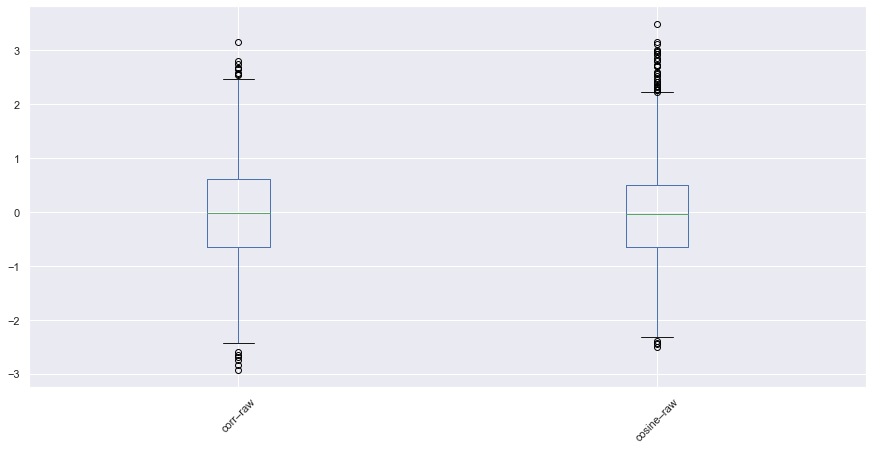

In [28]:
ZPAIRS.T.sort_index().T.plot.box(rot=45, figsize=(15,7));

In [29]:
# ZPAIRS.describe().T.sort_values('std').style.background_gradient(cmap='GnBu', high=.5)

In [30]:
# ZPAIRS.corr().style.background_gradient(cmap='GnBu', high=.5, axis=None)

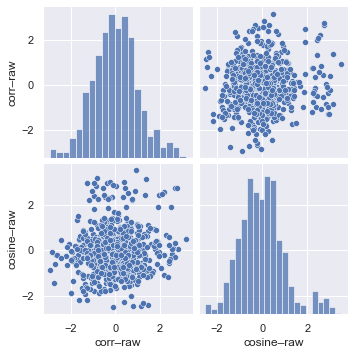

In [31]:
sns.pairplot(ZPAIRS);

# Create Clusters

## Hiearchical

In [32]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [33]:
def hca(sims, title="My Dendrogram", linkage_method='ward', color_thresh=None, figsize=(10, 10)):

    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.label.values
    if not color_thresh:
        color_thresh = pd.DataFrame(tree)[2].median()
    
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.65',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)
    fig.suptitle(title, fontsize=20)

In [34]:
#sch.dendrogram

## Manual color thresholds 

In [35]:
PAIRS.columns.to_list()

['corr–raw', 'cosine–raw']

<Figure size 432x288 with 0 Axes>

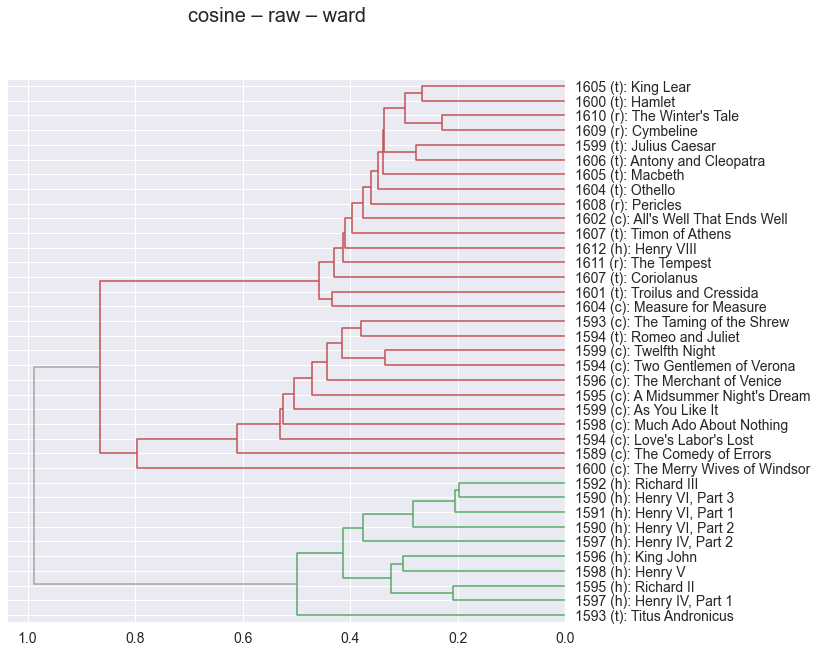

In [36]:
hca(PAIRS['cosine–raw'], 'cosine – raw – ward', linkage_method='ward', color_thresh=.9)

The cosine similarity reveals that all histories (except Henry VIII) are in one cluster and everything else is in the other cluster.  Note that the only non-history in the history cluster is Titus Andronicus.

In [37]:
#plt.close() # Save memory

## K-Means

K-Means *only* uses Euclidean distance. Why?

* The K-Means procedure does not explicitly use pairwise distances between data points. 
* Instead, it repeatedly assigns points to the closest centroid thereby using Euclidean distance from data points to a centroid. 
* However, K-Means is *implicitly* based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. 
* The term "centroid" is itself from Euclidean geometry. It is multivariate mean in Euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

See the [Cross Validated](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric) post on this.

In [38]:
from sklearn.cluster import KMeans

In [39]:
# n_clusters = 2
n_clusters = 2
# n_clusters = 5

In [40]:
km = KMeans(n_clusters)
DOC['y_raw'] = km.fit_predict(TFIDF)
DOC['y_L0'] = km.fit_predict(L0)
DOC['y_L1'] = km.fit_predict(L1)
DOC['y_L2'] = km.fit_predict(L2)

In [41]:
DOC.iloc[:].sort_values(['genre','year']).style.background_gradient(cmap='YlGn')

,label,year,genre,y_raw,y_L0,y_L1,y_L2
play_code,,,,,,,
Err,1589 (c): The Comedy of Errors,1589,comedy,1,0,0,0
Shr,1593 (c): The Taming of the Shrew,1593,comedy,1,0,0,0
LLL,1594 (c): Love's Labor's Lost,1594,comedy,1,0,0,0
TGV,1594 (c): Two Gentlemen of Verona,1594,comedy,1,0,0,0
MND,1595 (c): A Midsummer Night's Dream,1595,comedy,1,0,0,0
MV,1596 (c): The Merchant of Venice,1596,comedy,1,0,0,0
Ado,1598 (c): Much Ado About Nothing,1598,comedy,1,0,0,0
AYL,1599 (c): As You Like It,1599,comedy,1,0,0,0
TN,1599 (c): Twelfth Night,1599,comedy,1,0,0,0


In [42]:
y_col = 'y_L2'

In [43]:
#DOC.sort_values(y_col)[['label',y_col]].style.background_gradient()
DOC.sort_values(y_col)[['label','year','genre',y_col]].style.background_gradient(cmap='YlGn')

,label,year,genre,y_L2
play_code,,,,
Lr,1605 (t): King Lear,1605,tragedy,0
Tro,1601 (t): Troilus and Cressida,1601,tragedy,0
Tmp,1611 (r): The Tempest,1611,romance,0
Tim,1607 (t): Timon of Athens,1607,tragedy,0
TN,1599 (c): Twelfth Night,1599,comedy,0
TGV,1594 (c): Two Gentlemen of Verona,1594,comedy,0
Shr,1593 (c): The Taming of the Shrew,1593,comedy,0
Rom,1594 (t): Romeo and Juliet,1594,tragedy,0
Per,1608 (r): Pericles,1608,romance,0


Note that the only tragedy in cluster 1 is Titus Andronicus nad the only history in cluster 0 is Henry VIII. 

# Save Work

## Reduced BOW

Stack and pack the matrices.

In [44]:
BOW_REDUCED = TFIDF.stack().to_frame('tfidf')
BOW_REDUCED['binary'] = L0.stack()
BOW_REDUCED['tfidf_l1'] = L1.stack()
BOW_REDUCED['tfidf_l2'] = L2.stack()

## Save

In [45]:
BOW_REDUCED.to_csv(f"{data_home}/folger-BOW_REDUCED.csv")

In [46]:
BOW_REDUCED

tfidf  binary  tfidf_l1  tfidf_l2
play_code term_str                                      
1H4       abbey     0.000000       0  0.000000  0.000000
          abhor     0.000000       0  0.000000  0.000000
          abhorred  0.000000       0  0.000000  0.000000
          abide     0.007257       1  0.000320  0.010010
          abject    0.004942       1  0.000218  0.006816
...                      ...     ...       ...       ...
Wiv       youre     0.000000       0  0.000000  0.000000
          youth     0.000000       0  0.000000  0.000000
          youthful  0.000000       0  0.000000  0.000000
          zeal      0.000000       0  0.000000  0.000000
          zounds    0.000000       0  0.000000  0.000000

[148000 rows x 4 columns]